<a href="https://colab.research.google.com/github/22001391Jestrada/ProyectoFinalIA/blob/main/Proyecto_SP_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:



*   Esteban Castellanos&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;carnet: 22007232

*   José Estrada&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;carnet: 22001391

*   Angel Díaz&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;carnet: 22001839





#0) Data preparation

In [1]:
# Exportamos las librerias correspondientes
import matplotlib.pyplot as plt

# Para la manipulacion de los datos
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# para la visualizacion de mas graficas complejas
import seaborn as sns

# Para la red neuronal
import tensorflow as tf

# Miscellaneous Libraries
import os

# Constante global para el entrenamiento accelerado
AUTOTUNE = tf.data.AUTOTUNE

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx


--2025-05-30 19:21:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘ENB2012_data.xlsx’

ENB2012_data.xlsx       [ <=>                ]  74.40K  --.-KB/s    in 0.1s    

2025-05-30 19:21:34 (541 KB/s) - ‘ENB2012_data.xlsx’ saved [76189]



In [3]:
# Cargamos el dataset
raw_dataset = pd.read_excel("ENB2012_data.xlsx")

# Describir los valores
raw_dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
raw_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
raw_dataset.dtypes

,0
X1,float64
X2,float64
X3,float64
X4,float64
X5,float64
X6,int64
X7,float64
X8,int64
Y1,float64
Y2,float64


In [6]:
raw_dataset.shape

(768, 10)

In [7]:
# Hacemos una copia de la data original
new_dataset_AI = raw_dataset.copy()

# Miramos los valores nulos y despues los borramos
print(new_dataset_AI.isna().sum())

new_dataset = new_dataset_AI.dropna()

# verificamos la nueva data
new_dataset.head()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


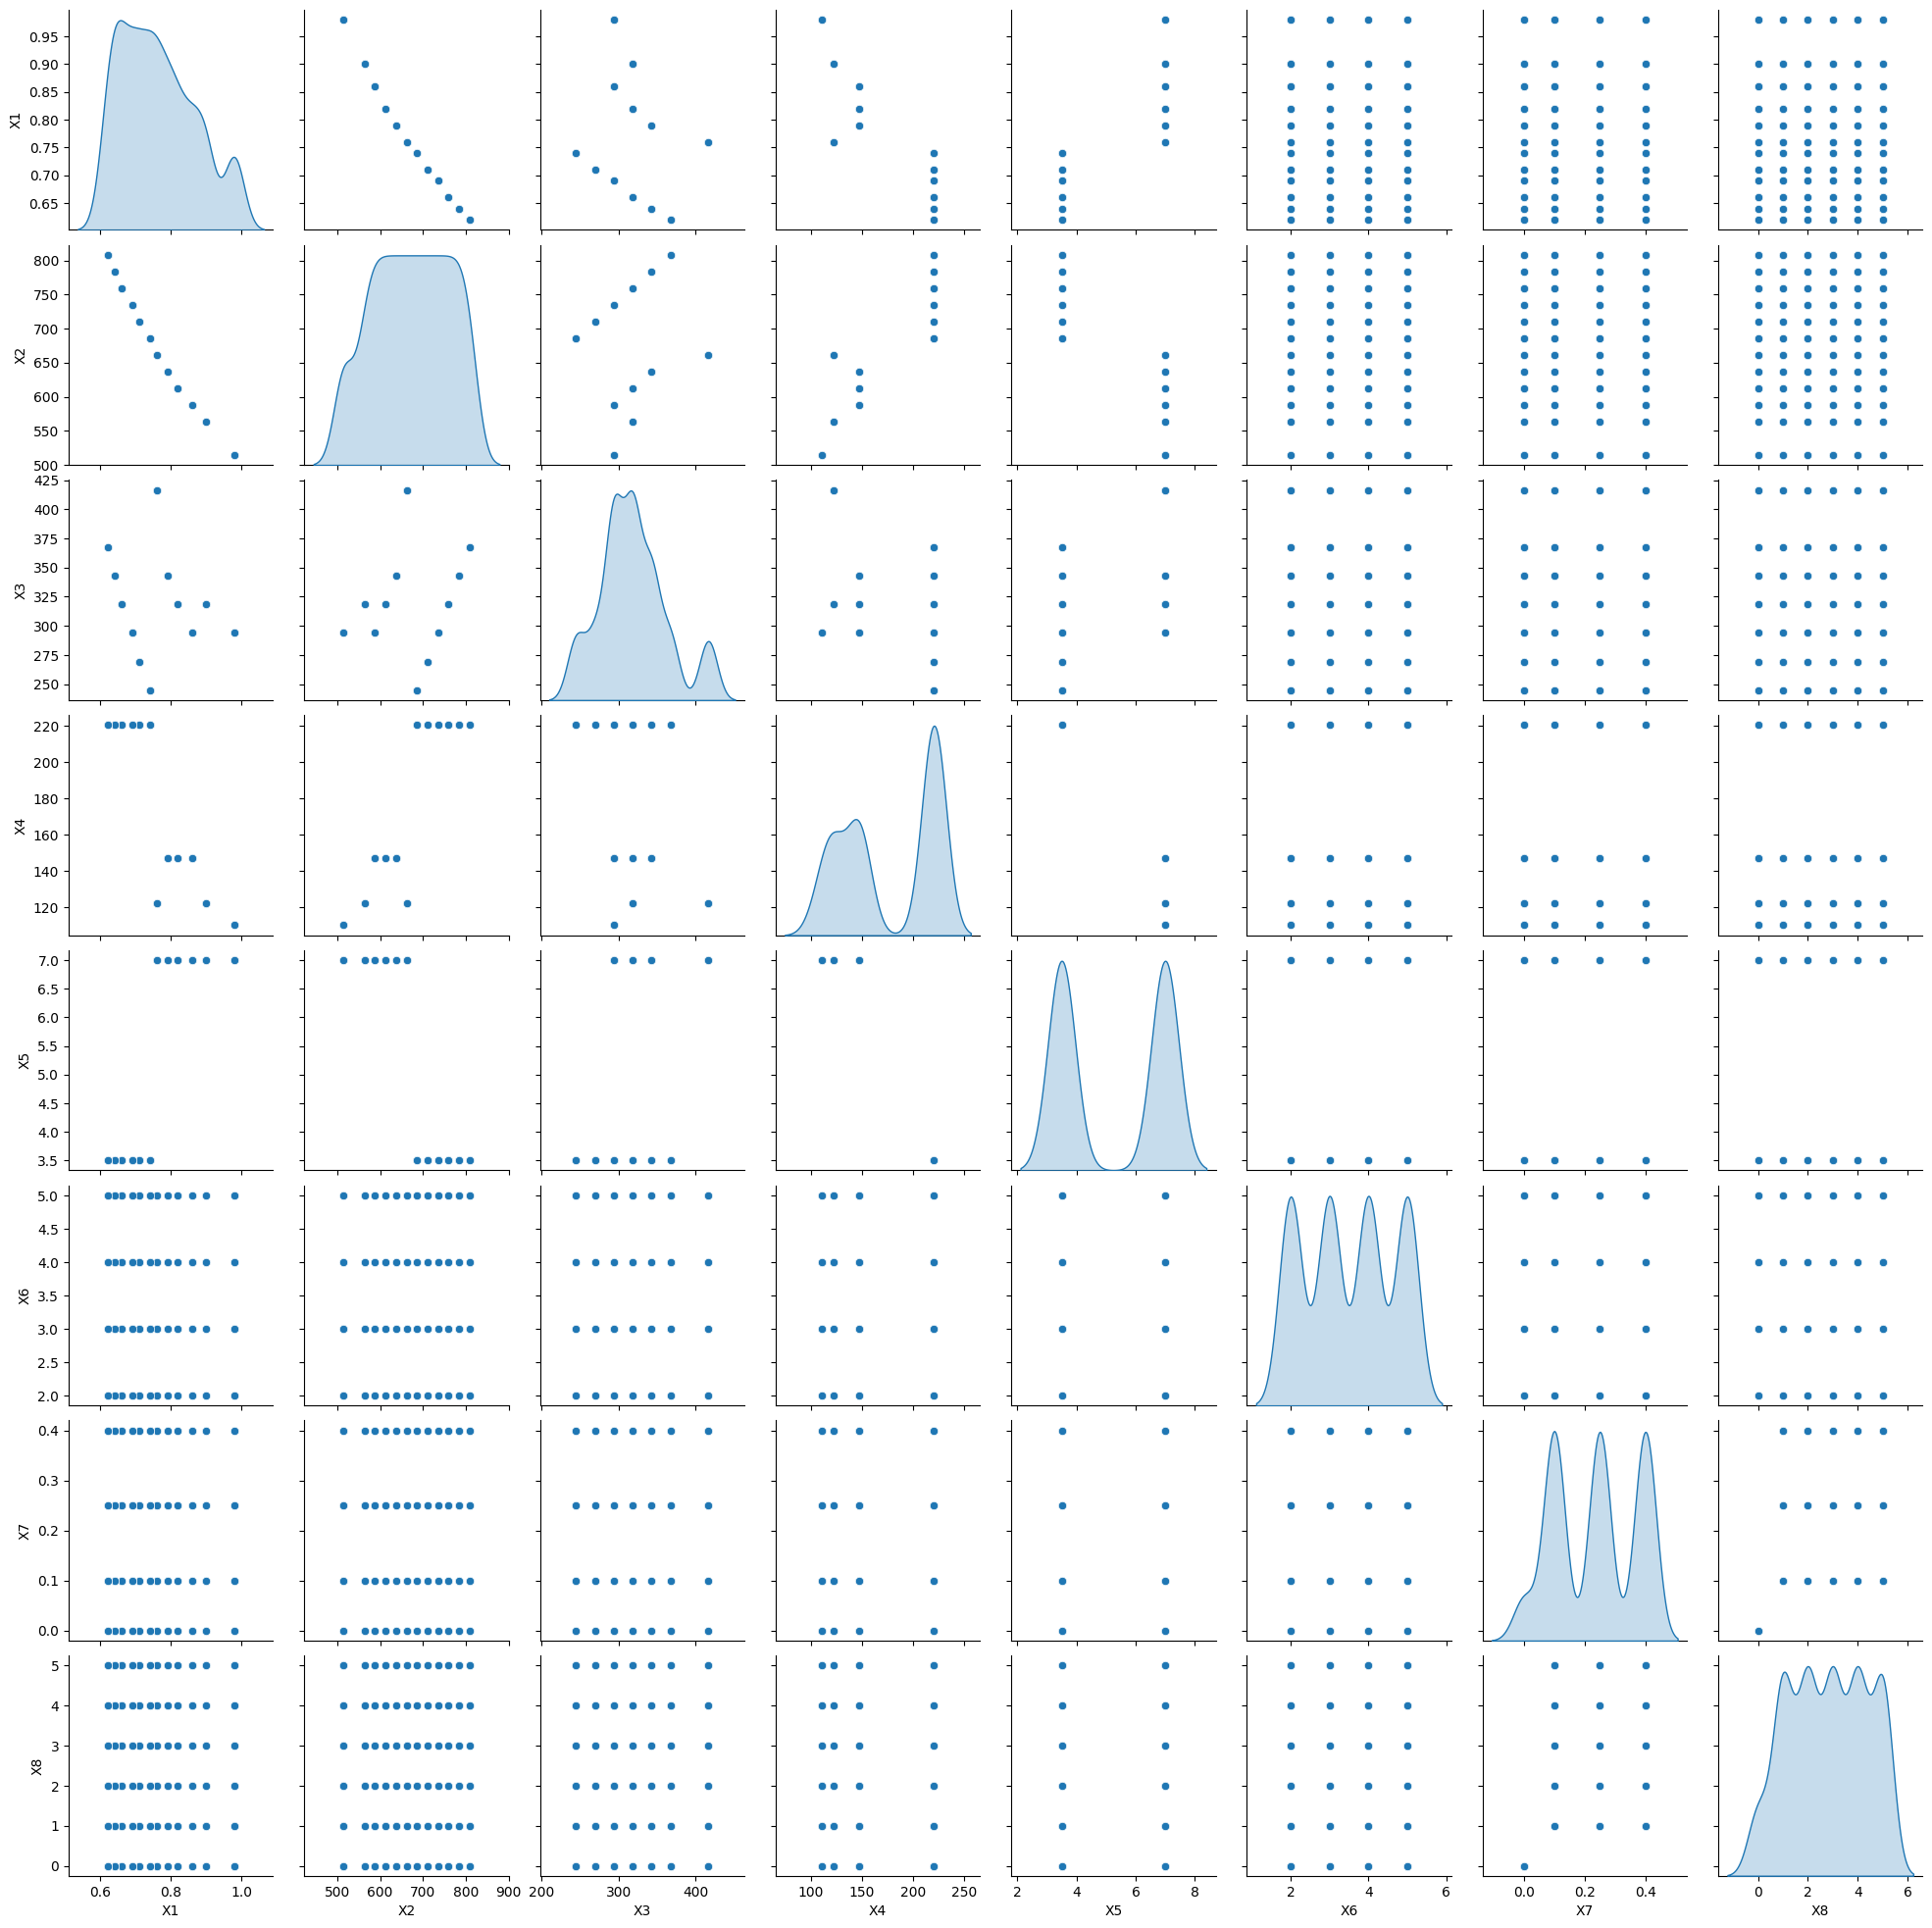

In [8]:
# Visualizamos la data por medio de graficas pero solo variables numericas
sns.pairplot(new_dataset[['X1','X2','X3',
                          'X4','X5','X6','X7','X8']], diag_kind="kde")

#1) Proceso para la red neuronal

## 1.1)Tecnica de Feature Enginier

In [9]:
# Aplicamos One-Hot Encoding a las variables categoricas
df_encoded = pd.get_dummies(new_dataset, columns=['X6', 'X8'], drop_first=True)


In [10]:
#Separamos por medio de varibles dependientes e independientes
independent_variables = df_encoded.drop(['Y1', 'Y2'], axis=1)
dependent_variables = df_encoded[['Y1', 'Y2']]

##1.2) Normalización

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar los escaladores
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajustar y transformar los datos
X_normalized = scaler_X.fit_transform(independent_variables)
y_normalized = scaler_y.fit_transform(dependent_variables)

# Convertir a DataFrames para facilitar el manejo
X_normalized_df = pd.DataFrame(X_normalized, columns=independent_variables.columns)
y_normalized_df = pd.DataFrame(y_normalized, columns=dependent_variables.columns)

# Mostrar resultados
print("Datos de entrada normalizados:")
print(X_normalized_df.head())

print("\nDatos de salida normalizados:")
print(y_normalized_df.head())

Datos de entrada normalizados:
         X1        X2        X3        X4   X5   X7  X6_3  X6_4  X6_5  X8_1  \
0  1.000000  0.000000  0.285714  0.000000  1.0  0.0   0.0   0.0   0.0   0.0   
1  1.000000  0.000000  0.285714  0.000000  1.0  0.0   1.0   0.0   0.0   0.0   
2  1.000000  0.000000  0.285714  0.000000  1.0  0.0   0.0   1.0   0.0   0.0   
3  1.000000  0.000000  0.285714  0.000000  1.0  0.0   0.0   0.0   1.0   0.0   
4  0.777778  0.166667  0.428571  0.111111  1.0  0.0   0.0   0.0   0.0   0.0   

   X8_2  X8_3  X8_4  X8_5  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0  

Datos de salida normalizados:
         Y1        Y2
0  0.257212  0.280905
1  0.257212  0.280905
2  0.257212  0.280905
3  0.257212  0.280905
4  0.399838  0.468085


##1.3) Preparación del entrenamiento

In [12]:
# Distribuimos las variables categoricas
X = X_normalized_df
y = y_normalized_df

# Concatenamos
new_dataset = pd.concat([X, y], axis=1)


#Separamos los valores para el entramiento y prueba
train, test = train_test_split(new_dataset, test_size=0.2)

X_columns = X.columns
y_columns = y.columns

X_train = train[X_columns]
y_train = train[y_columns]

X_test = test[X_columns]
y_test = test[y_columns]

In [13]:
X_train

,X1,X2,X3,X4,X5,X7,X6_3,X6_4,X6_5,X8_1,X8_2,X8_3,X8_4,X8_5
683,0.666667,0.250000,0.285714,0.333333,1.0,1.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
740,0.388889,0.500000,1.000000,0.111111,1.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
509,0.250000,0.666667,0.142857,1.000000,0.0,0.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
335,0.000000,1.000000,0.714286,1.000000,0.0,0.625,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
296,0.666667,0.250000,0.285714,0.333333,1.0,0.625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.777778,0.166667,0.428571,0.111111,1.0,0.250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
664,0.055556,0.916667,0.571429,1.000000,0.0,1.000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,0.250000,0.666667,0.142857,1.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
y_train

,Y1,Y2
683,0.720949,0.541341
740,0.884605,0.766765
509,0.166622,0.102612
335,0.246697,0.130891
296,0.634403,0.621600
...,...,...
101,0.638177,0.499327
664,0.336209,0.266092
28,0.009706,0.009965
763,0.320032,0.282790


#2) Modelo 1

##2.1) Creación del modelo

In [15]:
#Creamos el modelo de red neuronal densa para regresión multivariable

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='linear'),
])

#Compilamos el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

#Entrenamos el modelo
complete_model = model.fit(X_train,
                           y_train,
                           epochs=100,
                           batch_size=32,
                           validation_split=0.2,
                           )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.1719 - root_mean_squared_error: 0.4097 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1672
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0510 - root_mean_squared_error: 0.2248 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1341
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0351 - root_mean_squared_error: 0.1873 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0249 - root_mean_squared_error: 0.1575 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0226 - root_mean_squared_error: 0.1502 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0224 - root_mean_squared_error: 0.1494 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

In [16]:
# Evaluamos el modelo
evaluation = model.evaluate(X_test, y_test, batch_size=128)
print("Pérdida y RMSE en el conjunto de prueba:", evaluation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0068 - root_mean_squared_error: 0.0822
Pérdida y RMSE en el conjunto de prueba: [0.006948580965399742, 0.08335814625024796]


In [17]:
# Veficamos si y_test es un DataFrame
print(type(y_test))


<class 'pandas.core.frame.DataFrame'>


##2.2) Calculamos $R^2$

In [18]:
# prompt: has el calculo del coeficiente de determinacion

from sklearn.metrics import r2_score
import numpy as np

# Assuming you have made predictions from your trained model on the test set
# Replace 'y_pred' with your actual predictions
y_pred = model.predict(X_test)

# Calculate the R-squared score for each output variable
r2_y1 = r2_score(y_test.iloc[:, 0], y_pred[:, 0])
r2_y2 = r2_score(y_test.iloc[:, 1], y_pred[:, 1])

print(f"R-squared for Y1: {r2_y1}")
print(f"R-squared for Y2: {r2_y2}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R-squared for Y1: 0.9072496011146785
R-squared for Y2: 0.8825242595702706


##2.3) Gráfica entre el valor real y el valor predicho

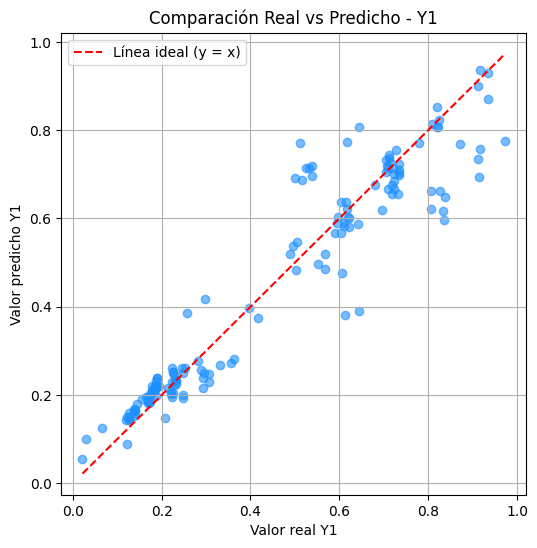

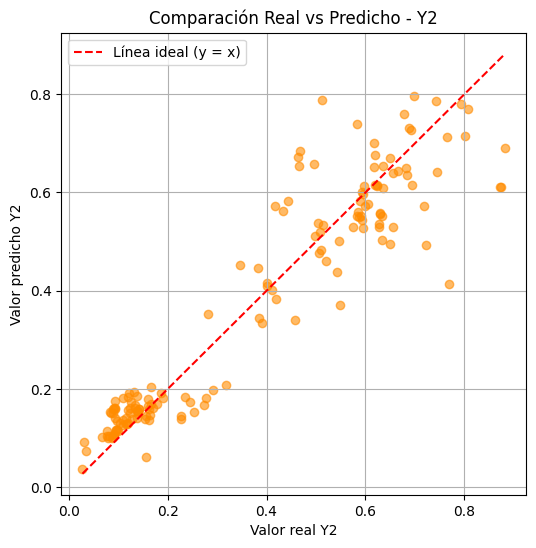

In [19]:
# prompt: realiza la grafica entre y_test y y_pred

import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes tus valores reales y predichos
# y_test: valores reales
# y_pred: valores predichos por el modelo

# Convertimos a arrays para fácil acceso por columnas
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Para Y1
plt.figure(figsize=(6,6))
plt.scatter(y_test_array[:, 0], y_pred_array[:, 0], color='dodgerblue', alpha=0.6)
plt.plot([y_test_array[:, 0].min(), y_test_array[:, 0].max()],
         [y_test_array[:, 0].min(), y_test_array[:, 0].max()],
         'r--', label='Línea ideal (y = x)')
plt.xlabel("Valor real Y1")
plt.ylabel("Valor predicho Y1")
plt.title("Comparación Real vs Predicho - Y1")
plt.legend()
plt.grid(True)
plt.show()

# Para Y2
plt.figure(figsize=(6,6))
plt.scatter(y_test_array[:, 1], y_pred_array[:, 1], color='darkorange', alpha=0.6)
plt.plot([y_test_array[:, 1].min(), y_test_array[:, 1].max()],
         [y_test_array[:, 1].min(), y_test_array[:, 1].max()],
         'r--', label='Línea ideal (y = x)')
plt.xlabel("Valor real Y2")
plt.ylabel("Valor predicho Y2")
plt.title("Comparación Real vs Predicho - Y2")
plt.legend()
plt.grid(True)
plt.show()

#3) Modelo 2

##3.1) Preparación de los datos

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Copiamos y limpiamos el dataset
new_dataset_AI = raw_dataset.copy()
new_dataset = new_dataset_AI.dropna()

# Separar variables independientes y dependientes
independent_variables = ['X1','X2','X3','X4','X5','X6','X7','X8']
dependent_variables = ['Y1','Y2']

X = new_dataset[independent_variables]
y = new_dataset[dependent_variables]

# Aplicamos escalado MinMax a X y y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Convertimos los arrays escalados en dataframes para compatibilidad
X_scaled_df = pd.DataFrame(X_scaled, columns=independent_variables)
y_scaled_df = pd.DataFrame(y_scaled, columns=dependent_variables)

# Dividimos en entrenamiento y prueba (con los datos normalizados)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_scaled_df, test_size=0.2, random_state=42
)


##3.2) Creación del modelo

In [28]:
#Creamos el modelo de red neuronal para multiples regresiones
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(units=len(dependent_variables), activation='linear'),  # <--- Lineal para regresión
])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

#Compilamos el modelo
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


##3.3) Compilación y verificación de las predicciones

In [29]:
#Entrenamos el modelo
complete_model = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])

loss, rmse, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")

# Predecimos con el modelo
y_pred_scaled = model.predict(X_test)

# Invertimos el escalado (si usaste MinMaxScaler en y)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Calculamos R² para Y1 y Y2 por separado
r2_y1 = r2_score(y_true[:, 0], y_pred[:, 0])
r2_y2 = r2_score(y_true[:, 1], y_pred[:, 1])

print(f"R² para Y1: {r2_y1:.4f}")
print(f"R² para Y2: {r2_y2:.4f}")


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 1.8415 - mean_absolute_error: 1.0925 - root_mean_squared_error: 1.3485 - val_loss: 0.1138 - val_mean_absolute_error: 0.2631 - val_root_mean_squared_error: 0.3373
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6966 - mean_absolute_error: 0.6366 - root_mean_squared_error: 0.8339 - val_loss: 0.1026 - val_mean_absolute_error: 0.2508 - val_root_mean_squared_error: 0.3203
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4665 - mean_absolute_error: 0.5429 - root_mean_squared_error: 0.6828 - val_loss: 0.1222 - val_mean_absolute_error: 0.2799 - val_root_mean_squared_error: 0.3495
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3734 - mean_absolute_error: 0.4718 - root_mean_squared_error: 0.6108 - val_loss: 0.1192 - val_mean_absolute_error: 0.2755 - val_root_mean_squared_error: 0.3452
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2862 - mean_absolute_error: 0.4192 - root_mean_squar

##3.4) Gráfica entre los valores reales con lo valores predichos

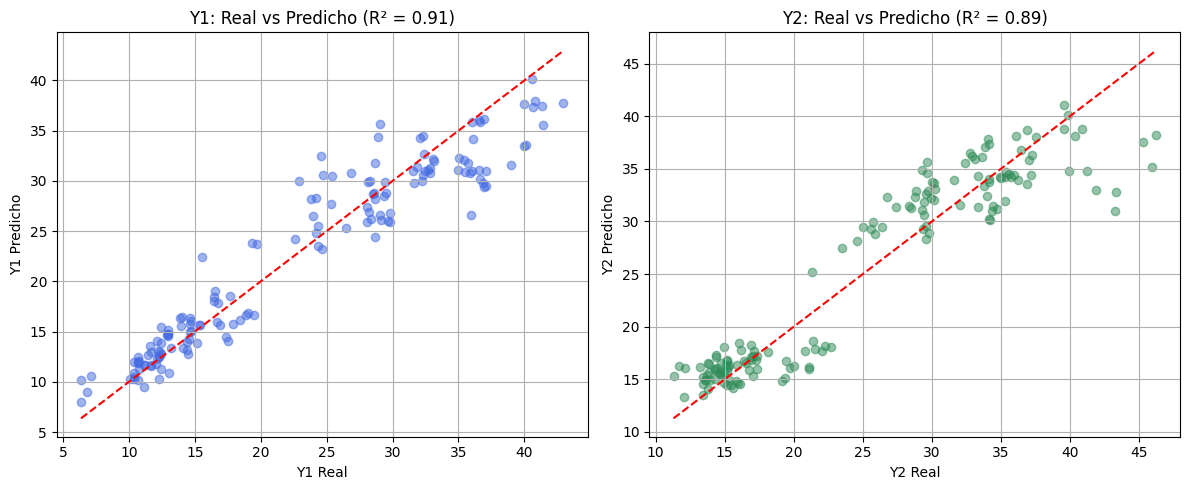

In [30]:
import matplotlib.pyplot as plt

# Gráfico Real vs Predicho para Y1 y Y2
plt.figure(figsize=(12, 5))

# Y1: Real vs Predicho
plt.subplot(1, 2, 1)
plt.scatter(y_true[:, 0], y_pred[:, 0], alpha=0.5, color='royalblue')
plt.plot([y_true[:, 0].min(), y_true[:, 0].max()],
         [y_true[:, 0].min(), y_true[:, 0].max()],
         'r--')  # Línea de identidad
plt.xlabel('Y1 Real')
plt.ylabel('Y1 Predicho')
plt.title(f'Y1: Real vs Predicho (R² = {r2_y1:.2f})')
plt.grid(True)

# Y2: Real vs Predicho
plt.subplot(1, 2, 2)
plt.scatter(y_true[:, 1], y_pred[:, 1], alpha=0.5, color='seagreen')
plt.plot([y_true[:, 1].min(), y_true[:, 1].max()],
         [y_true[:, 1].min(), y_true[:, 1].max()],
         'r--')  # Línea de identidad
plt.xlabel('Y2 Real')
plt.ylabel('Y2 Predicho')
plt.title(f'Y2: Real vs Predicho (R² = {r2_y2:.2f})')
plt.grid(True)

plt.tight_layout()
plt.show()


#4) Modelo 3

##4.1) Preparación de los datos

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



# Cargar y preparar los datos
raw_dataset = pd.read_excel("ENB2012_data.xlsx")
new_dataset = raw_dataset.dropna()

# Variables independientes y dependiente Y1
X = new_dataset[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = new_dataset[['Y1']]

# Escalar datos
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


##4.2) Creación del modelo

In [32]:
# modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1)  # Una sola salida, sin activación (lineal por defecto)
])

# modelo compilado
model.compile(optimizer='adam', loss='mse')

# training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


##4.3) Compilación y evaluacón

In [34]:
# evaluate
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

# Métricas
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"TensorFlow Linear Regression")
print(f"MSE: {mse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
TensorFlow Linear Regression
MSE: 10.1257 | MAE: 2.4368 | R²: 0.9029


##4.4) Gráfica entre los valores reales y los valores predichos

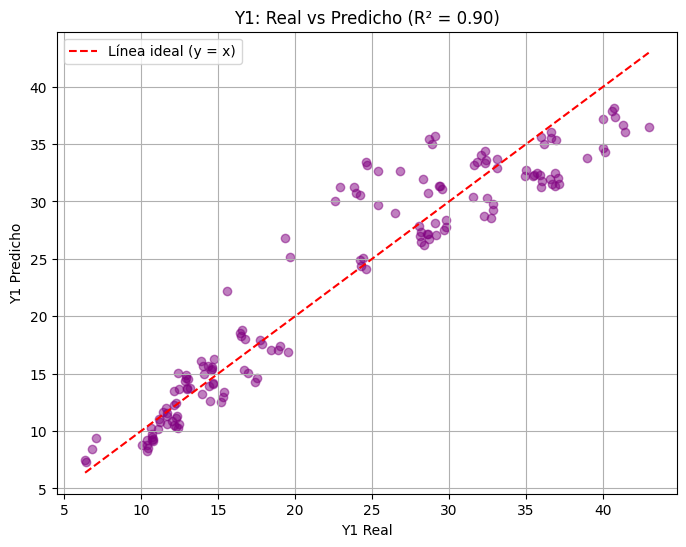

In [35]:

plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.5, color='purple')
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', label='Línea ideal (y = x)')  # Línea de identidad
plt.xlabel('Y1 Real')
plt.ylabel('Y1 Predicho')
plt.title(f'Y1: Real vs Predicho (R² = {r2:.2f})')
plt.legend()
plt.grid(True)
plt.show()
